<a href="https://colab.research.google.com/github/J-o-y-y/ms_ai_school/blob/main/20230627_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80%EC%9D%98_%EA%B2%B0%EC%A0%95_%EA%B2%BD%EA%B3%84_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 로지스틱 회귀의 결정 경계 실습

import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

Streaming output truncated to the last 5000 lines.
        [6.6789e-02],
        [6.1084e-02],
        [1.8486e-02],
        [2.7512e-01],
        [9.2860e-04],
        [4.5654e-03],
        [1.7985e-01],
        [1.2764e-03],
        [9.2264e-01],
        [2.4180e-01],
        [2.0118e-01],
        [2.4255e-02],
        [7.5607e-03],
        [4.3568e-03],
        [1.5680e-02],
        [9.5744e-03],
        [1.5171e-02],
        [3.1428e-02],
        [1.3741e-02],
        [7.0668e-03],
        [4.6286e-03],
        [1.0985e-02],
        [4.8606e-02],
        [6.1218e-03],
        [1.8947e-03],
        [6.5110e-02],
        [6.5564e-03],
        [2.5977e-02],
        [3.0336e-03],
        [5.9567e-01],
        [4.6720e-04],
        [1.7130e-02],
        [9.9932e-03],
        [2.5623e-02],
        [1.2665e-02],
        [7.8715e-01],
        [1.0994e-01],
        [7.0438e-02],
        [1.1128e-01],
        [1.4418e-01],
        [8.8403e-03],
        [5.4169e-02],
        [2.6583e-03],
   

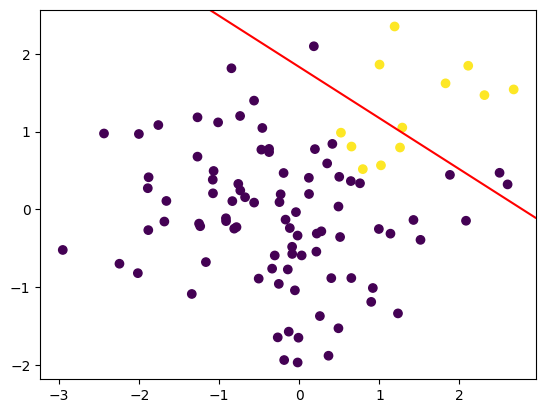

In [2]:

### 임의의 데이터 생성
x = torch.randn(100, 2)
y =((x[:,0] > 0.5) & (x[:,1] >0.5)).float()

print(x, y)
### 모델 정의

class LogisiticRegression(torch.nn.Module) :
    def __init__(self, input_dim, output_dim) :
        super(LogisiticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x) :
        out = self.linear(x)
        fc = F.sigmoid(out)
        print("fc >>>" ,fc)
        return fc

model = LogisiticRegression(input_dim=2, output_dim=1)

print(model)
### 모델 학습 , 결정 경계 그리기
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(1000) :
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 결정 경계 그리기
plt.scatter(x[:,0], x[:,1], c=y)
x_min, x_max = plt.xlim() # x 좌표 최소값 최대값
y_min, y_max = plt.ylim() # Y 좌표 최소값 최대값

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
"""
np.meshgrid() -> x, y 좌표를 기반으로 격자 포인트 생성

xx, yy -> 2차원 배열 가집니다.
"""

z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32)).detach().numpy()
"""
 xx yy -> np.c_[] : xx yy 연결-> torch.tensor 변경하고 ravel() -> 2차원 배열 1차원 평면화 -> 변환된 입력 -> 모델 전달
 -> .detach().numpy() 예측값을 넘파이 형태로변환 -> z 저장

"""
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, levels=[0.5], colors='r')
"""
plt.contour() -> xx, yy 격자에 대응하는 결정경계 그리는 함수
"""
plt.show()
